# 4. Model and results
## 4.1 Fully Connected Structure

In [ ]:
#Import all needed libraries
import os
import numpy as np
from os import listdir
from imageio import imread
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils.image_utils import img_to_array

import PIL
import matplotlib.pyplot as plt

from tensorflow import keras
import numpy as np
import pandas as pd
import sklearn as sk
import time
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras import optimizers
from keras import backend as K
from keras import regularizers
from keras import initializers
import keras as ks
from matplotlib import pyplot as plt


In [ ]:
#Connected to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Settings 
num_classes = 10
test_size = 0.2

In [ ]:
#Read image and convert to 3D array
def get_img(data_path): 
  ## Getting image array from path: 
  img = PIL.Image.open(data_path)
  img = img.convert("L")
  img = img_to_array(img)
  img = np.resize(img, (100, 100))
#   img = np.load(data_path)
  return img

uint8
(100, 100, 3)


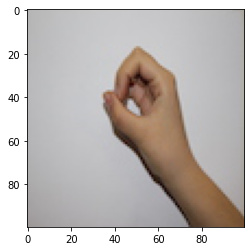

In [ ]:
#Get dataset form pictures and split totrain and test sets
from matplotlib import image
from matplotlib import pyplot
#Load image as pixel array
image = image.imread('/content/drive/MyDrive/4050_Final_Dataset/0/IMG_1118.JPG')
#Summarize shape of the pixel array
print(image.dtype)
print(image.shape)
#Display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

In [ ]:
dataset_path = "/content/drive/MyDrive/4050_Final_Dataset"

## Getting all data from data path
labels = sorted(listdir(dataset_path))
print(labels)
X = []
Y = []
for i, label in enumerate(labels): 
  data_path = dataset_path + "/" + label
  
  for data in listdir(data_path): 
    img = get_img(data_path + "/" + data)
    X.append(img)
    Y.append(i)
## create dataset 
X = 1 - np.array(X).astype("float32") /255
# X = np.array(X).astype("float32")
Y = np.array(Y).astype("float32")
Y = to_categorical(Y, num_classes)

X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state = 42)
print(X.shape)
print(X_test.shape)
print(Y.shape)
print(Y_test.shape)


['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
(1649, 100, 100)
(413, 100, 100)
(1649, 10)
(413, 10)


(-0.5, 99.5, 99.5, -0.5)

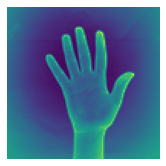

In [ ]:
img_size = 64

plt.subplot(1 , 2 , 1)
plt.imshow(X[0])
plt.axis("off")

In [ ]:
from keras.utils.np_utils import to_categorical
## unroll the height and width and thickness into one big vector
x_train = X.reshape(1649, 10000)
x_test = X_test.reshape(413, 10000)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

## normalize pixel values from 0 to 255
# data is already normalized 
# x_train /= 255
# x_test /= 255


# y_train = to_categorical(Y, 10)
# Y_test = to_categorical(Y_test, 10)
y_train = Y
y_test = Y_test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1649, 10000)
(1649, 10)
(413, 10000)
(413, 10)


Part A:
The general idea is that I kept using neural network with one hidden layer and one dropout, with momentum stochastic gradient descent, different activation functions, batch size and epoch. I used activation function "sigmoid" at first, with batch size = 50. As the accuracy is pretty lower, at around 0.10, I changed parameters many times. For example, I changed batch size by increasing it gradually. As it still not working, I decided to use other activation function such as softmax. Softmax is used for normalizing the outputs, since it can convert them from weighted sum values into probabilities that sum to one. The value in the output of the softmax function will be interpreted as the prbability of membership for each class. And I also decreased the value of batch size. As a result, the accuracy increased to 0.40~0.50.
The accuracy enhanced to the largest (0.7191) with batch size = 36 and activation function = sigmoid. 

In [ ]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim =x_train.shape[1]))
#One hidden layer + one dropout
model.add(Dropout(0.1))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.summary()

#Momentum Stochastic Gradient Descent 
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                100010    
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 55        
                                                                 
 dense_2 (Dense)             (None, 10)                60        
                                                                 
Total params: 100,125
Trainable params: 100,125
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(x_train, y_train,batch_size=32,
               epochs=100, verbose=2)

Epoch 1/100
52/52 - 1s - loss: 2.3173 - accuracy: 0.1079 - 758ms/epoch - 15ms/step
Epoch 2/100
52/52 - 0s - loss: 2.2974 - accuracy: 0.1249 - 179ms/epoch - 3ms/step
Epoch 3/100
52/52 - 0s - loss: 2.2865 - accuracy: 0.1395 - 159ms/epoch - 3ms/step
Epoch 4/100
52/52 - 0s - loss: 2.2759 - accuracy: 0.1589 - 156ms/epoch - 3ms/step
Epoch 5/100
52/52 - 0s - loss: 2.2624 - accuracy: 0.1953 - 166ms/epoch - 3ms/step
Epoch 6/100
52/52 - 0s - loss: 2.2444 - accuracy: 0.2116 - 169ms/epoch - 3ms/step
Epoch 7/100
52/52 - 0s - loss: 2.2238 - accuracy: 0.2256 - 151ms/epoch - 3ms/step
Epoch 8/100
52/52 - 0s - loss: 2.1953 - accuracy: 0.2438 - 164ms/epoch - 3ms/step
Epoch 9/100
52/52 - 0s - loss: 2.1607 - accuracy: 0.2771 - 164ms/epoch - 3ms/step
Epoch 10/100
52/52 - 0s - loss: 2.1240 - accuracy: 0.2577 - 158ms/epoch - 3ms/step
Epoch 11/100
52/52 - 0s - loss: 2.0832 - accuracy: 0.2735 - 153ms/epoch - 3ms/step
Epoch 12/100
52/52 - 0s - loss: 2.0333 - accuracy: 0.2996 - 154ms/epoch - 3ms/step
Epoch 13/100

In [ ]:
#Evaluate with test data
model.evaluate(x_test, y_test, batch_size=32)

13/13 [==============================] - 0s 2ms/step - loss: 0.9987 - accuracy: 0.6780


[0.9987353086471558, 0.6779661178588867]

Part B: In this part, I changed the activation function to relu, and used Nesterov momentum stochastic gradient descent, dropouts, L2 regularization and random Gaussian weight initialization with 1/sqrt(n) standard deviation.  Specifically, for layers, I created from 1 layers and kept adding to 3 layers. For epoch, the smallest I used is 5, and the largest I used is 100. By changing layers, dropouts, batch size, and epoch, I got the highest accuracy at around 0.20.

In [ ]:
#create a model structure, fit the model with train data, evaluate with test data
#Neural Network with three layers
model = Sequential()
model.add(Dense(32, activation='relu', input_dim =x_train.shape[1], kernel_regularizer=regularizers.l2(0.01),
               kernel_initializer=initializers.RandomNormal(mean=0,stddev=0.036)))
#hidden layer + dropout
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.summary()

#Momentum Stochastic Gradient Descent 
sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=sgd, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 321,418
Trainable params: 321,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,batch_size=32,
               epochs = 100, verbose=2)

Epoch 1/100
52/52 - 1s - loss: 9.0494 - accuracy: 0.1055 - 738ms/epoch - 14ms/step
Epoch 2/100
52/52 - 0s - loss: 8.0545 - accuracy: 0.1061 - 218ms/epoch - 4ms/step
Epoch 3/100
52/52 - 0s - loss: 7.4265 - accuracy: 0.1061 - 210ms/epoch - 4ms/step
Epoch 4/100
52/52 - 0s - loss: 6.9296 - accuracy: 0.1061 - 225ms/epoch - 4ms/step
Epoch 5/100
52/52 - 0s - loss: 6.5296 - accuracy: 0.1031 - 205ms/epoch - 4ms/step
Epoch 6/100
52/52 - 0s - loss: 6.2059 - accuracy: 0.0995 - 225ms/epoch - 4ms/step
Epoch 7/100
52/52 - 0s - loss: 5.9445 - accuracy: 0.1037 - 212ms/epoch - 4ms/step
Epoch 8/100
52/52 - 0s - loss: 5.7332 - accuracy: 0.1061 - 208ms/epoch - 4ms/step
Epoch 9/100
52/52 - 0s - loss: 5.5616 - accuracy: 0.1079 - 211ms/epoch - 4ms/step
Epoch 10/100
52/52 - 0s - loss: 5.4216 - accuracy: 0.0988 - 214ms/epoch - 4ms/step
Epoch 11/100
52/52 - 0s - loss: 5.3092 - accuracy: 0.1092 - 222ms/epoch - 4ms/step
Epoch 12/100
52/52 - 0s - loss: 5.2183 - accuracy: 0.1164 - 208ms/epoch - 4ms/step
Epoch 13/100

In [ ]:
#Evaluate with test data
model.evaluate(x_test, y_test, batch_size=32)

13/13 [==============================] - 0s 4ms/step - loss: 2.3092 - accuracy: 0.0775


[2.3091976642608643, 0.07748184353113174]

Part C: In this part, I used tuner to help me generate the best network model. However, the highest accuracy is at around 0.30, which is smaller than the accuracy in Part A.

In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Neural Network with two hidden layers
def build_model(hp):
    # hyperparam we want to tune: number of neurons, lr, activation func
    activation_func = hp.Choice("activation", ["sigmoid","relu"])
    learning_rate = hp.Float("lr", min_value=1e-3, max_value=1e-1, sampling="log")
    neuron_num = hp.Int("neuron-1", min_value=32, max_value=128, step=32)

    # create a model with two hidden layers
    model = Sequential()
    model.add((Dense(32, activation='sigmoid', input_dim =x_train.shape[1])))
    model.add(Dense(units=neuron_num, 
                    activation=activation_func))
    model.add(Dense(units=neuron_num, 
                    activation=activation_func))
    model.add(Dense(10, activation=activation_func))
    
    sgd = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)

    #Compile the model
    model.compile(loss='categorical_crossentropy',
                optimizer=sgd, metrics=['accuracy'])
    return model
    
build_model(keras_tuner.HyperParameters())
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10)

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 3ms/step - loss: 1.9399 - accuracy: 0.3002


[1.939896821975708, 0.3002421259880066]

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
activation: sigmoid
lr: 0.0633606054822938
neuron-1: 96
Score: 1.939896821975708
Trial summary
Hyperparameters:
activation: sigmoid
lr: 0.0031531212959390142
neuron-1: 64
Score: 2.3012585639953613
Trial summary
Hyperparameters:
activation: sigmoid
lr: 0.00198317724026896
neuron-1: 64
Score: 2.305431842803955
Trial summary
Hyperparameters:
activation: sigmoid
lr: 0.007116103500829736
neuron-1: 96
Score: 2.3058016300201416
Trial summary
Hyperparameters:
activation: sigmoid
lr: 0.0012066632140502118
neuron-1: 64
Score: 2.307534694671631
Trial summary
Hyperparameters:
activation: relu
lr: 0.012341315610031297
neuron-1: 32
Score: 3.4939591884613037
Trial summary
Hyperparameters:
activation: relu
lr: 0.0062658328965630354
neuron-1: 64
Score: 4.135528564453125
Trial summary
Hyperparameters:
activation: relu
lr: 0.0028925868757120306
neuron-1: 64
Score: 5.072015762329102
Trial summary
Hyperparam

In [ ]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320032    
                                                                 
 dense_1 (Dense)             (None, 96)                3168      
                                                                 
 dense_2 (Dense)             (None, 96)                9312      
                                                                 
 dense_3 (Dense)             (None, 10)                970       
                                                                 
Total params: 333,482
Trainable params: 333,482
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
activation (Choice)
{'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid', 'relu'], 'ordered': False}
lr (Float)
{'default': 0.001, 'conditions': [], 'min_value': 0.001, 'max_value': 0.1, 'step': None, 'sampling': 'log'}
neuron-1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 32, 'sampling': None}
